## DATA PROCESSING

In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

def load_and_preprocess_data(data_path, target_column=None):
    # Ignore warnings
    warnings.filterwarnings('ignore')
    
    # Load the dataset
    data = pd.read_csv(data_path)

    # Print the columns to inspect them
    print("Columns in the dataframe:", data.columns.tolist())

    # If target_column is not specified, use the last column as the target
    if target_column is None or target_column not in data.columns:
        target_column = data.columns[-1]
        print(f"'{target_column}' column not found or not specified, using '{target_column}' as the target.")

    # Extract features and target
    X = data.drop(target_column, axis=1)
    y = data[target_column]
    
    # Identify numeric and categorical columns
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

    # Print identified numeric and categorical columns
    print("Numeric features:", numeric_features)
    print("Categorical features:", categorical_features)

    # Define preprocessor
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Apply transformations to features
    X_preprocessed = preprocessor.fit_transform(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.20, random_state=0)

    return X_train, X_test, y_train, y_test

# Example usage:
# X_train, X_test, y_train, y_test = load_and_preprocess_data('path_to_your_dataset.csv')


In [2]:
# Example usage:
X_train, X_test, y_train, y_test = load_and_preprocess_data('diabetes.csv')
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts())
print("y_test distribution:\n", y_test.value_counts())

Columns in the dataframe: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
'Outcome' column not found or not specified, using 'Outcome' as the target.
Numeric features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Categorical features: []
X_train shape: (614, 8)
X_test shape: (154, 8)
y_train distribution:
 Outcome
0    393
1    221
Name: count, dtype: int64
y_test distribution:
 Outcome
0    107
1     47
Name: count, dtype: int64


## MODEL INTEGRATIONS WITH THEIR HYPERPARAMETRS 

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVC, SVR

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVC, SVR

def define_model_and_hyperparameters(model_type):
    """
    Defines the model and its hyperparameter search space based on the model type.

    Args:
        model_type (str): Type of the model (e.g., 'logistic', 'decision_tree', 'random_forest', 'random_forest_regression',
                          'neural_network', 'neural_network_regression', 'svm', 'svm_regression', 'gradient_boosting',
                          'gradient_boosting_regression').

    Returns:
        Tuple: The model and its hyperparameter search space.
    """
    if model_type == 'logistic':
        model = LogisticRegression()
        hyperparameters = {
            'C': [0.01, 0.1, 1, 10, 100],  
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'saga']
        }
    elif model_type == 'decision_tree':
        model = DecisionTreeClassifier()
        hyperparameters = {
            'max_depth': [2, 4, 6, 8, 10, 12, 15, None],
            'min_samples_split': [2, 5, 10], 
            'min_samples_leaf': [1, 2, 4, 8],  
            'criterion': ['gini', 'entropy']
        }
    elif model_type == 'random_forest':
        model = RandomForestClassifier()
        hyperparameters = {
            'criterion': ['gini', 'entropy'],
            'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 
            'max_features': ['sqrt', 'log2', None], 
            'min_samples_leaf': [1, 2, 4, 8], 
            'min_samples_split': [2, 5, 10],  
            'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 
        }
    elif model_type == 'random_forest_regression':
        model = RandomForestRegressor()
        hyperparameters = {
            'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 
            'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],  
            'min_samples_split': [2, 5, 10],  
            'min_samples_leaf': [1, 2, 4, 8], 
            'criterion': ['squared_error', 'absolute_error']  
        }
    elif model_type == 'neural_network':
        model = MLPClassifier()
        hyperparameters = {
            'hidden_layer_sizes': [(10,), (20,), (30,), (50,), (100,), (200,)],  
            'activation': ['relu', 'tanh', 'logistic'],  
            'alpha': [0.0001, 0.001, 0.01, 0.1],  
            'solver': ['adam', 'sgd'],  
            'learning_rate_init': [0.001, 0.01, 0.1]  
        }
    elif model_type == 'neural_network_regression':
        model = MLPRegressor()
        hyperparameters = {
            'hidden_layer_sizes': [(10,), (20,), (30,), (50,), (100,), (200,)],  
            'activation': ['relu', 'tanh', 'logistic'], 
            'alpha': [0.0001, 0.001, 0.01, 0.1],  
            'solver': ['adam', 'sgd'], 
            'learning_rate_init': [0.001, 0.01, 0.1]  
        }
    elif model_type == 'svm':
        model = SVC()
        hyperparameters = {
            'C': [0.1, 1, 10, 100], 
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
            'gamma': ['scale', 'auto']  
        }
    elif model_type == 'svm_regression':
        model = SVR()
        hyperparameters = {
            'C': [0.1, 1, 10, 100], 
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
            'gamma': ['scale', 'auto']  
        }
    elif model_type == 'gradient_boosting':
        model = GradientBoostingClassifier()
        hyperparameters = {
            'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 
            'max_depth': [2, 4, 6, 8, 10, None],  
            'min_samples_split': [2, 5, 10, 20],  
            'min_samples_leaf': [1, 2, 4, 8, 16],  
            'learning_rate': [0.01, 0.05, 0.1, 0.2]  
        }
    elif model_type == 'gradient_boosting_regression':
        model = GradientBoostingRegressor()
        hyperparameters = {
            'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 
            'max_depth': [2, 4, 6, 8, 10, None],  
            'min_samples_split': [2, 5, 10, 20],  
            'min_samples_leaf': [1, 2, 4, 8, 16],  
            'learning_rate': [0.01, 0.05, 0.1, 0.2]  
        }
    else:
        raise ValueError('Invalid model type')

    return model, hyperparameters


### PLOTTING LEARNING RATE 

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import learning_curve
# Function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

## IMPORTING THE EXAMPLE MODEL TO BE USED i.e.RANDOM FOREST 

In [19]:

model_type = 'random_forest'  # Change this to the desired model type
model1, hyperparameters1 = define_model_and_hyperparameters(model_type)

# Now you have the model and its corresponding hyperparameters
# You can use them for further processing, such as model training, hyperparameter tuning, etc.
print("Model Type:", model_type)
print("Model1:", model1)
print("Hyperparameters1:", hyperparameters1)

Model Type: random_forest
Model1: RandomForestClassifier()
Hyperparameters1: {'criterion': ['gini', 'entropy'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'max_features': ['sqrt', 'log2', None], 'min_samples_leaf': [1, 2, 4, 8], 'min_samples_split': [2, 5, 10], 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


In [20]:

rf_classifier=model1.fit(X_train,y_train)
prediction1=rf_classifier.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction1))
print(accuracy_score(y_test,prediction1))
print(classification_report(y_test,prediction1))

[[93 14]
 [17 30]]
0.7987012987012987
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       107
           1       0.68      0.64      0.66        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.80      0.80      0.80       154



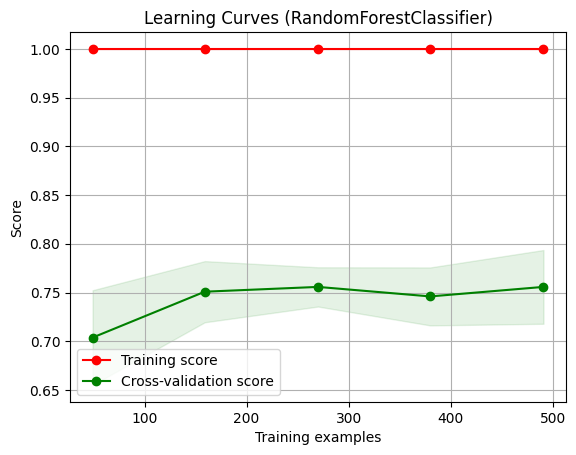

In [22]:
# Plot learning curve
title = "Learning Curves (RandomForestClassifier)"
plot_learning_curve(model1, title, X_train, y_train, cv=5, n_jobs=4)

plt.show()

## MANUAL HYPERTUNNING THE MODEL

In [23]:
model2=RandomForestClassifier(n_estimators=300,max_depth=150,criterion='gini',
                             max_features='sqrt',min_samples_leaf=10,random_state=100).fit(X_train,y_train)
predictions2=model2.predict(X_test)
print(confusion_matrix(y_test,predictions2))
print(accuracy_score(y_test,predictions2))
print(classification_report(y_test,predictions2))

[[98  9]
 [17 30]]
0.8311688311688312
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       107
           1       0.77      0.64      0.70        47

    accuracy                           0.83       154
   macro avg       0.81      0.78      0.79       154
weighted avg       0.83      0.83      0.83       154



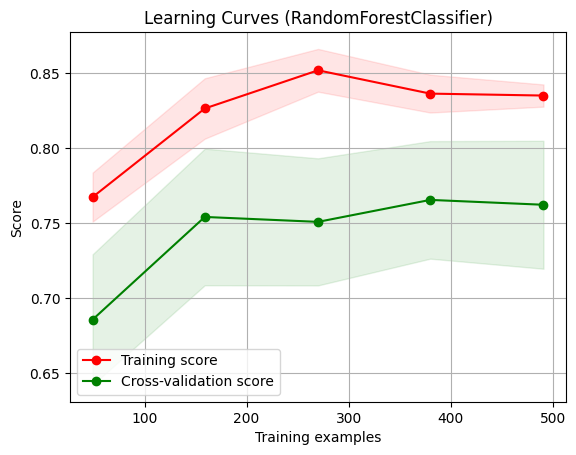

In [24]:
# Plot learning curve
title = "Learning Curves (RandomForestClassifier)"
plot_learning_curve(model2, title, X_train, y_train, cv=5, n_jobs=4)

plt.show()

## RANDOM SEARCH CV

In [25]:
model_type = 'random_forest'  # Change this to the desired model type
rf,random_grid  = define_model_and_hyperparameters(model_type)

In [26]:
print(random_grid)

{'criterion': ['gini', 'entropy'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'max_features': ['sqrt', 'log2', None], 'min_samples_leaf': [1, 2, 4, 8], 'min_samples_split': [2, 5, 10], 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


In [27]:
from sklearn.model_selection import RandomizedSearchCV
model3=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
model3.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=100, verbose=2)

In [28]:
model3.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': None,
 'max_depth': 30,
 'criterion': 'gini'}

In [29]:
model3
best_random_grid=model3.best_estimator_
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[92 15]
 [14 33]]
Accuracy Score 0.8116883116883117
Classification report:               precision    recall  f1-score   support

           0       0.87      0.86      0.86       107
           1       0.69      0.70      0.69        47

    accuracy                           0.81       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.81      0.81      0.81       154



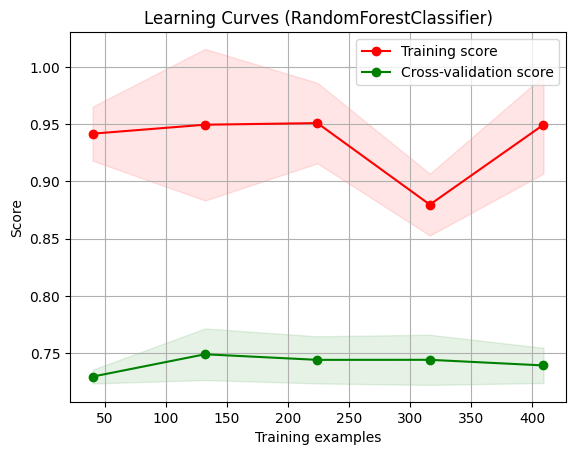

In [30]:
# Plot learning curve
title = "Learning Curves (RandomForestClassifier)"
plot_learning_curve(model3, title, X_train, y_train, cv=3, n_jobs=4)

plt.show()

## USING HYPEROPT FOR TUNNING

In [31]:
!pip install hyperopt
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials

In [38]:
space = {
    'criterion': hp.choice('criterion', ['entropy', 'gini']),
    'max_depth': hp.quniform('max_depth', 10, 1200, 1),
    'max_features': hp.choice('max_features', ['sqrt', 'log2', None]),
    'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5),
    'min_samples_split': hp.uniform('min_samples_split', 0, 1),
    'n_estimators': hp.choice('n_estimators', [10, 50, 300, 750, 1200, 1300, 1500])
}

In [39]:
model_type = 'random_forest'  # Change this to the desired model type

def objective(space):
    model4 = RandomForestClassifier(
        criterion=space['criterion'],
        max_depth=int(space['max_depth']),  # Round max_depth to the nearest integer
        max_features=space['max_features'],
        min_samples_leaf=space['min_samples_leaf'],
        min_samples_split=space['min_samples_split'],
        n_estimators=space['n_estimators']
    )
    
    accuracy = cross_val_score(model4, X_train, y_train, cv = 5).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }
from sklearn.model_selection import cross_val_score
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 80,
            trials= trials)
best

100%|██████████| 80/80 [08:34<00:00,  6.43s/trial, best loss: -0.7671331467413035]


{'criterion': 1,
 'max_depth': 692.0,
 'max_features': 1,
 'min_samples_leaf': 0.07368479176491333,
 'min_samples_split': 0.018859358650438085,
 'n_estimators': 0}

In [40]:
crit = {0: 'entropy', 1: 'gini'}
feat = {0: 'auto', 1: 'sqrt', 2: 'log2', 3: None}
est = {0: 10, 1: 50, 2: 300, 3: 750, 4: 1200,5:1300,6:1500}

print(crit[best['criterion']])
print(feat[best['max_features']])
print(est[best['n_estimators']])

gini
sqrt
10


In [41]:
best['min_samples_leaf']

0.07368479176491333

In [42]:
model5 = RandomForestClassifier(criterion = crit[best['criterion']], max_depth = int(best['max_depth']), 
                                       max_features = feat[best['max_features']], 
                                       min_samples_leaf = best['min_samples_leaf'], 
                                       min_samples_split = best['min_samples_split'], 
                                       n_estimators = est[best['n_estimators']]).fit(X_train,y_train)
predictionforest = model5.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(accuracy_score(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc5 = accuracy_score(y_test,predictionforest)

[[96 11]
 [26 21]]
0.7597402597402597
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       107
           1       0.66      0.45      0.53        47

    accuracy                           0.76       154
   macro avg       0.72      0.67      0.69       154
weighted avg       0.75      0.76      0.74       154



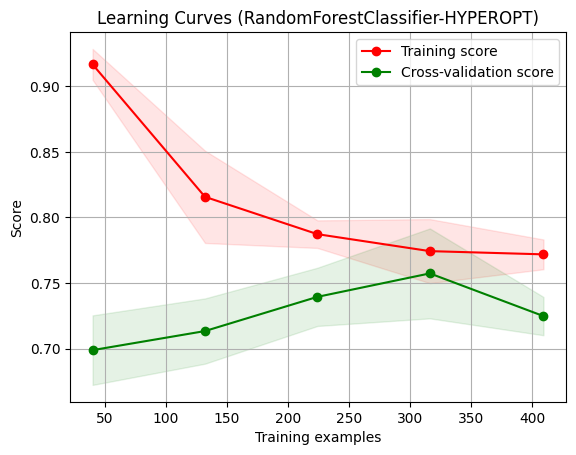

In [43]:
# Plot learning curve
title = "Learning Curves (RandomForestClassifier-HYPEROPT)"
plot_learning_curve(model5, title, X_train, y_train, cv=3, n_jobs=4)

plt.show()

## BAYESIAN OPTIMIZATION WITHOUT USING EXTERNAL LIBRARY


In [44]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [45]:
# Define the objective function
def objective_function(params):
    if model_type == 'random_forest':
        clf = RandomForestClassifier(
        criterion=params['criterion'],
        max_depth=params['max_depth'],
        max_features=params['max_features'],
        min_samples_leaf=params['min_samples_leaf'],
        min_samples_split=params['min_samples_split'],
        n_estimators=params['n_estimators']
        )
      # We minimize negative accuracy to maximize accuracy
    if model_type == 'logistic':
        clf = LogisticRegression(
            C=params['C'],
            penalty=params['penalty'],
            solver=params['solver']
        )
    elif model_type == 'decision_tree':
        clf = DecisionTreeClassifier(
            max_depth=params['max_depth'],
            min_samples_split=params['min_samples_split'],
            min_samples_leaf=params['min_samples_leaf'],
            criterion=params['criterion']
        )
    elif model_type == 'random_forest_regression':
        clf = RandomForestRegressor(
            n_estimators=params['n_estimators'],
            max_depth=params['max_depth'],
            min_samples_split=params['min_samples_split'],
            min_samples_leaf=params['min_samples_leaf'],
            criterion=params['criterion']
        )
    elif model_type == 'neural_network':
        clf = MLPClassifier(
            hidden_layer_sizes=params['hidden_layer_sizes'],
            activation=params['activation'],
            alpha=params['alpha'],
            solver=params['solver']
        )
    elif model_type == 'neural_network_regression':
        clf = MLPRegressor(
            hidden_layer_sizes=params['hidden_layer_sizes'],
            activation=params['activation'],
            alpha=params['alpha'],
            solver=params['solver']
        )
    elif model_type == 'svm':
        clf = SVC(
            C=params['C'],
            kernel=params['kernel'],
            gamma=params['gamma']
        )
    elif model_type == 'svm_regression':
        clf = SVR(
            C=params['C'],
            kernel=params['kernel'],
            gamma=params['gamma']
        )
    elif model_type == 'gradient_boosting':
        clf = GradientBoostingClassifier(
            n_estimators=params['n_estimators'],
            max_depth=params['max_depth'],
            min_samples_split=params['min_samples_split'],
            min_samples_leaf=params['min_samples_leaf'],
            learning_rate=params['learning_rate']
        )
    elif model_type == 'gradient_boosting_regression':
        clf = GradientBoostingRegressor(
            n_estimators=params['n_estimators'],
            max_depth=params['max_depth'],
            min_samples_split=params['min_samples_split'],
            min_samples_leaf=params['min_samples_leaf'],
            learning_rate=params['learning_rate']
        )
    # Perform cross-validation
    score = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy').mean()
    
    # We minimize negative accuracy to maximize accuracy
    return -score

In [46]:

model_type = 'random_forest'
model6 ,space = define_model_and_hyperparameters(model_type)

# Encoding the categorical variables
def encode_params(params, space):
    encoded = []
    for key, value in params.items():
        if isinstance(space[key], list):
            encoded.append(space[key].index(value))
        else:
            encoded.append(value)
    return np.array(encoded)

def decode_params(encoded_params, space):
    decoded = {}
    for i, key in enumerate(space.keys()):
        if isinstance(space[key], list):
            decoded[key] = space[key][int(encoded_params[i])]
        else:
            decoded[key] = encoded_params[i]
    return decoded

def sample_space(space):
    
    sampled_params = {}
    for key, value in space.items():
        if isinstance(value, list) or isinstance(value, np.ndarray):
            sampled_params[key] = np.random.choice(value)
        elif isinstance(value, tuple) and len(value) == 2:
            sampled_params[key] = np.random.uniform(value[0], value[1])
        else:
            raise ValueError(f"Unsupported value type for key {key}: {value}")
    return sampled_params

def bayesian_optimization(objective_function, space, n_iter=100, n_init=10, xi=0.01):
    # Initialize sample points and objective values
    X = np.array([encode_params(sample_space(space), space) for _ in range(n_init)])
    y = np.array([objective_function(decode_params(x, space)) for x in X])

    # Gaussian process model with Matern kernel
    kernel = Matern(nu=2.5)
    gp = GaussianProcessRegressor(kernel=kernel, alpha=1e-6)

    def ei(x, gp, y_best, xi):
        mu, sigma = gp.predict(np.array(x).reshape(1, -1), return_std=True)
        z = (mu - y_best - xi) / sigma
        return (mu - y_best - xi) * norm.cdf(z) + sigma * norm.pdf(z)

    # Bayesian optimization loop
    for _ in range(n_iter):
        # Fit the Gaussian process model to the data
        gp.fit(X, y)

        # Find the point that maximizes the acquisition function
        y_best = np.min(y)
        x_next = None
        max_ei = -np.inf

        # Sample random points and evaluate EI to find the next sampling point
        for _ in range(1000):
            x_sample = encode_params(sample_space(space), space)
            curr_ei = ei(x_sample, gp, y_best, xi)
            if curr_ei > max_ei:
                max_ei = curr_ei
                x_next = x_sample

        # Evaluate the objective function at the new point
        y_next = objective_function(decode_params(x_next, space))

        # Update the data
        X = np.vstack((X, x_next))
        y = np.append(y, y_next)

    # Find the best solution
    best_idx = np.argmin(y)
    best_x = X[best_idx]
    best_y = y[best_idx]

    return decode_params(best_x, space), best_y

# Run the optimization
best_params, best_value = bayesian_optimization(objective_function, space)
print("Best Parameters:", best_params)
print("Best Value:",best_value)

Best Parameters: {'criterion': 'entropy', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 800}
Best Value: -0.7622550979608157


In [47]:

model6 = RandomForestClassifier(**best_params)

model6.fit(X_train, y_train)
# Predict on the test set
bayesian_prediction = model6.predict(X_test)

# Print the evaluation metrics
print(confusion_matrix(y_test, bayesian_prediction))
print(accuracy_score(y_test,bayesian_prediction))
print(classification_report(y_test, bayesian_prediction))
# Calculate accuracy score
acc5 = accuracy_score(y_test, bayesian_prediction)


[[98  9]
 [19 28]]
0.8181818181818182
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.60      0.67        47

    accuracy                           0.82       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154



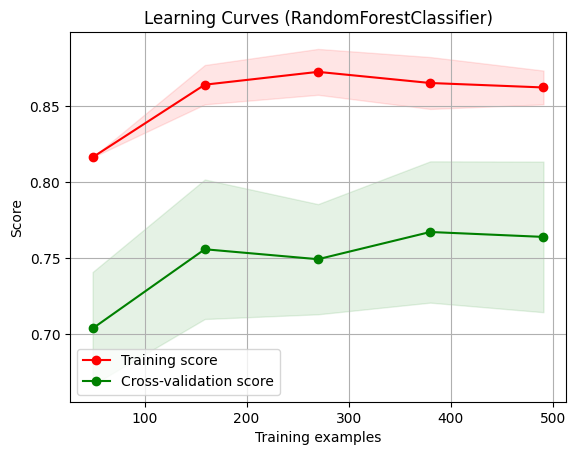

In [48]:
# Plot learning curve
title = "Learning Curves (RandomForestClassifier)"
plot_learning_curve(model6, title, X_train, y_train, cv=5, n_jobs=4)
plt.show()

## ROC AUC CURVE

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

def plot_roc_auc(model, X_train, y_train, X_test, y_test):
    # Make probability predictions
    predictionforest_prob = model.predict_proba(X_test)
    
    # Binarize the output for multi-class case
    if len(np.unique(y_train)) > 2:
        y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
        y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
        
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(y_train_bin.shape[1]):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], predictionforest_prob[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        
        # Plot ROC curve for each class
        for i in range(y_train_bin.shape[1]):
            plt.figure()
            plt.plot(fpr[i], tpr[i], color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc[i]:0.2f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'Receiver Operating Characteristic - Class {i}')
            plt.legend(loc="lower right")
            plt.show()
    else:
        fpr, tpr, _ = roc_curve(y_test, predictionforest_prob[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()



#### FOR THE MODEL IMPORTED

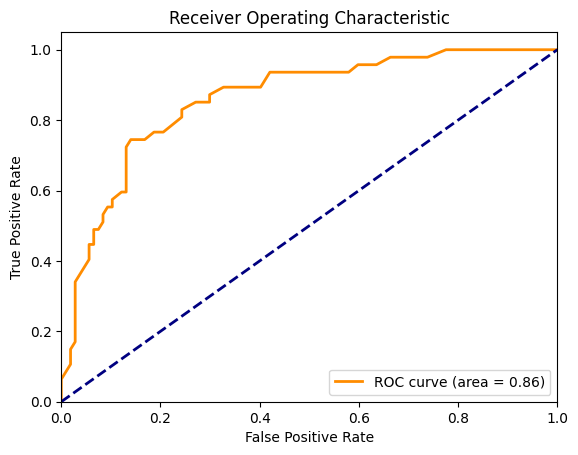

In [50]:
plot_roc_auc(model1,X_train, y_train, X_test, y_test)

#### FOR THE MODEL USING MANUAL HYPERTUNNING

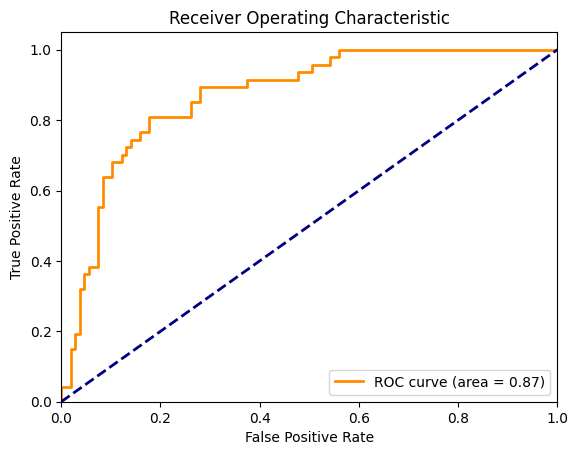

In [51]:
plot_roc_auc(model2,X_train, y_train, X_test, y_test)

#### FOR THE MODEL USING RANDOM SEARCH CV

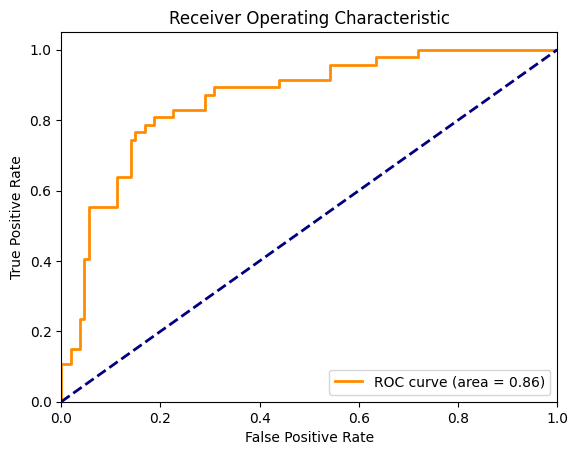

In [52]:
plot_roc_auc(model3,X_train, y_train, X_test, y_test)

#### FOR THE MODEL TUNNED USING HYPEROPT LIBRARY

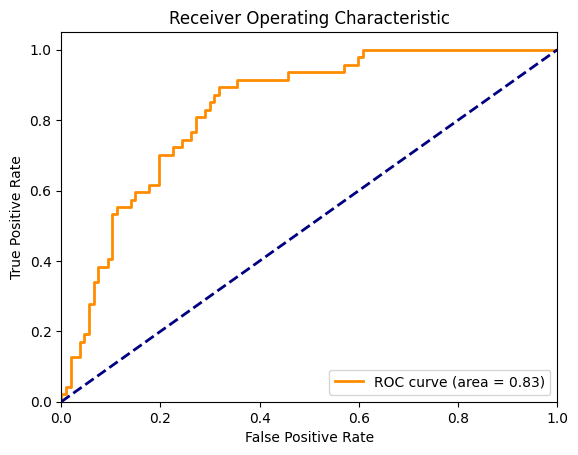

In [53]:
plot_roc_auc(model5,X_train, y_train, X_test, y_test)

#### FOR THE MODEL USING BAYESIAN APPROACH ALGO

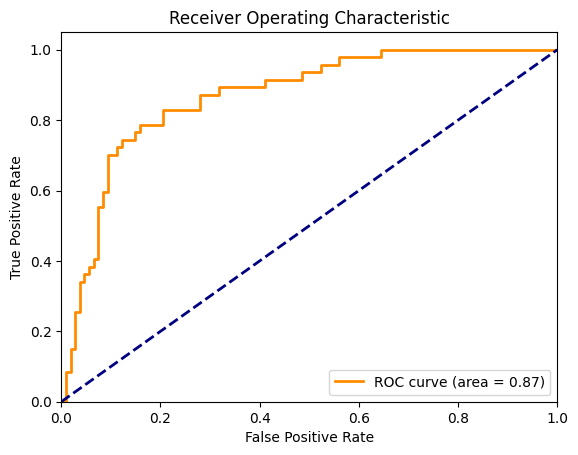

In [54]:
plot_roc_auc(model6,X_train, y_train, X_test, y_test)